In [100]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [66]:
dfs = {}
year = [1980,1984,1989,1991,1996,1998,1999,2004,2009,2014,2019,2024]
for i in year:
    dfs[i] = pd.read_csv(f'/Users/badrinathsanagavaram/Desktop/Election Data Analysis/Data/transformed-data-backup/{i}-backup-data.csv')

In [78]:
year = [1980,1984,1989,1991,1996,1998,1999,2004,2009,2014,2019,2024]
length = len(year)
df_1 = pd.DataFrame()
for i in range(0,length):
    df = pd.DataFrame()
    df = dfs[year[i]].groupby(['State', 'Winning Party']).agg(
        {
        'Winning Party'  : "count",
        'Winner\'s Votes' : "sum",
        'Runner Up Votes' : "sum"
    }).rename(columns={"Winning Party": "count"}).reset_index()
    df['Year'] = year[i]
    filt = (df['Winning Party'] == 'INC') | (df['Winning Party'] == 'BJP')
    df = df.loc[filt]
    df_1 = pd.concat([df,df_1], ignore_index=True)

In [79]:
df_1['votes_polled'] = df_1['Runner Up Votes'] + df_1['Winner\'s Votes']

In [22]:
df_1['percentage_of_votes_polled'] = (df_1['Winner\'s Votes'] / df_1['votes_polled']) * 100

In [80]:
df_1.drop(columns='votes_polled', inplace=True)

In [94]:
df_year_wise_party_wise_performance = df_1.groupby(['Winning Party', 'Year']) \
.agg({'Winner\'s Votes':'sum', 
      'Runner Up Votes' : 'sum',
      'count' : 'sum'
      }).reset_index()

In [95]:
df_year_wise_party_wise_performance.sort_values(by=['Year', 'Winning Party'])

,Winning Party,Year,Winner's Votes,Runner Up Votes,count
0,BJP,1980,422520,360450,3
12,INC,1980,69790312,41322982,378
1,BJP,1984,551317,453223,2
13,INC,1984,98425335,59428535,418
2,BJP,1989,23089559,15807095,85
14,INC,1989,58199081,42523728,197
3,BJP,1991,23936837,18099234,121
15,INC,1991,61110346,40328933,238
4,BJP,1996,39379800,28191792,165
16,INC,1996,37245489,29515424,141


In [84]:
year = [1980,1984,1989,1991,1996,1998,1999,2004,2009,2014,2019,2024]
total_voter_df = pd.DataFrame()
length = 0
for i in year:
    
    total_voter_df = pd.concat([total_voter_df , dfs[i].groupby('Year').agg({
    'Winner\'s Votes' : 'sum',
    'Runner Up Votes' : 'sum'
    }).reset_index()])
total_voter_df

,Year,Winner's Votes,Runner Up Votes
0,1980,104256025,66658770
0,1984,132297825,85611973
0,1989,154683079,107976505
0,1991,135209801,94062777
0,1996,154057090,112592915
0,1998,171706128,134947659
0,1999,180885918,142242093
0,2004,199694219,147951263
0,2009,190651230,148087350
0,2014,261079285,176175631


In [67]:
dfs[2019]['Year'] = 2019
dfs[2024]['Year'] = 2024 

In [86]:
total_voter_df.rename(
    columns={
        "Winner's Votes": "Total Winner Votes",
        "Runner Up Votes": "Total Runner Votes"
    }, inplace=True
)

In [98]:
#df_year_wise_party_wise_performance=pd.merge(df_year_wise_party_wise_performance,total_voter_df,on='Year', how='left')
df_year_wise_party_wise_performance['Total Voting Percentage'] = (df_year_wise_party_wise_performance['Winner\'s Votes']/(df_year_wise_party_wise_performance['Total Winner Votes'] + df_year_wise_party_wise_performance['Total Runner Votes'])) * 100

In [ ]:
df_year_wise_party_wise_performance.set_index('Year', inplace=True)

/Users/badrinathsanagavaram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/badrinathsanagavaram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/badrinathsanagavaram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/badrinathsanagavaram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

<Axes: xlabel='Year', ylabel='Total Voting Percentage'>

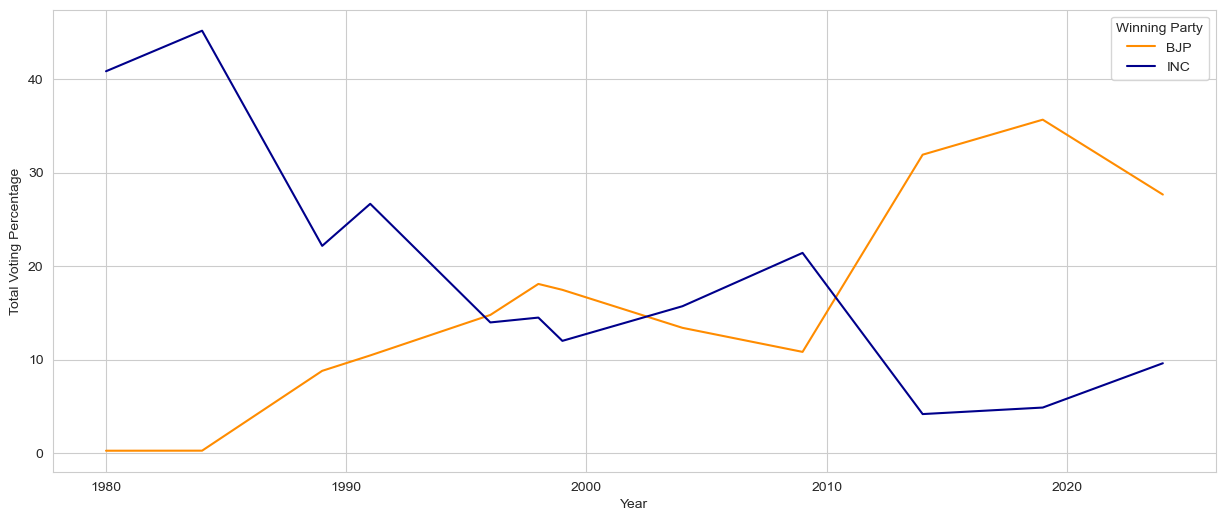

In [128]:
party_colors = {'BJP': 'darkorange',
                'INC': 'darkblue'}
sns.set_style("whitegrid")
sns.lineplot(data=df_year_wise_party_wise_performance,
             x='Year',
             y = 'Total Voting Percentage',
             hue='Winning Party', markers='o',
             palette=party_colors)

/Users/badrinathsanagavaram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/badrinathsanagavaram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/badrinathsanagavaram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/badrinathsanagavaram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

<Axes: xlabel='Year', ylabel='count'>

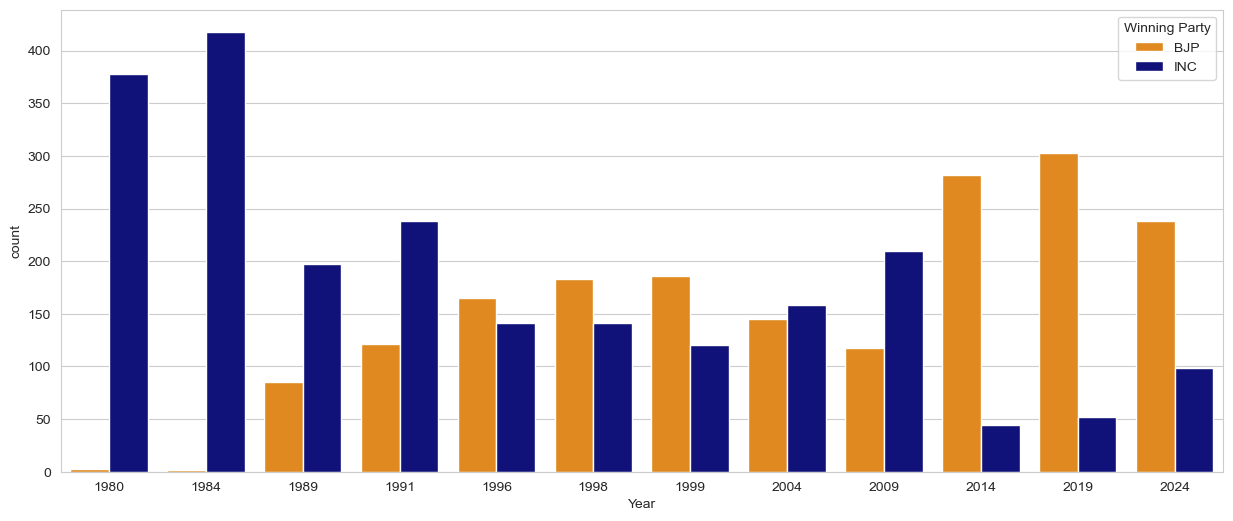

In [136]:
party_colors = {'BJP': 'darkorange',
                'INC': 'darkblue'}
sns.set_style("whitegrid")
sns.barplot(data=df_year_wise_party_wise_performance,
             x='Year',
             y = 'count',
             hue='Winning Party',
             palette=party_colors)

In [132]:
df_year_wise_party_wise_performance.reset_index(inplace=True)